Author: Vera Lake <br>
Project: D213: Task 1

# Scenario
In the telecommunications industry, customers can choose from multiple service providers
and actively switch from one provider to another. Customer churn is defined as the
percentage of customers who stopped using a provider’s product or service during a certain
time frame. In this highly competitive market, some telecommunications industries can
experience average annual churn rates as high as 25%. Given that it costs 10 times more to
acquire a new customer than to retain an existing one, customer retention has now become
even more important than customer acquisition.

For many providers, retaining highly profitable customers is the number one business goal.
To reduce customer churn, telecommunications companies need to predict which customers
are at high risk of churn.

As part of the “churn” project, executives would like to see consider a time series on
revenue from the first years of operation. Once they understand any patterns in that data,
they feel confident in understanding the impact of churn in current times. The given time
series data records the daily revenue, in million dollars, during the first two years of
operation.

**Data File being used:**
teleco_time_series.csv

**Data Dictionary**
The data set consists of 731 rows (days) and two columns or variables:
- Day: Day during first two years of operation
- Revenue: Revenue in million dollars

# Part I:  Research Question

## A.  Describe the purpose of this data analysis by doing the following:

### A1.  Summarize one research question that is relevant to a real-world organizational situation captured in the selected data set and that you will answer using time series modeling techniques.
*Rubric: The submission summarizes 1 research question, and the research question is relevant to a realistic organizational situation and can be addressed using the selected data set and time series modeling techniques.*

Is it possible to forecast the daily revenue of TeleCo for the next quarter so that the company can plan a project for network capacity expansions for its customers?

### A2.  Define the objectives or goals of the data analysis. Ensure that your objectives or goals are reasonable within the scope of the scenario and are represented in the available data.
*Rubric: The submission clearly defines each of the objectives or goals of the data analysis. Each objective or goal is reasonable within the scope of the scenario and represented in the available data.*

To build a predictive model that will forecast future revenue, by analyzing the daily revenue for the past two years to identify overall trends, seasonality, and other factors.



# Part II:  Method Justification

## B.  Summarize the assumptions of a time series model including stationarity and autocorrelated data.
*Rubric: The submission accurately summarizes each of the assumptions of a time series model. The summary includes stationarity and autocorrelated data.*
Resource: https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc446.htm

**General Assumptions of Time Series Models** 
1. The time series data should be stationary. This means that the time series is normally distributed and the mean and variance are constant over that period of time. The series zero trends, it is not growing or shrinking. The variance is constant. The autocorrelation is constant. (Datacamp, n.d)
2. The error term is randomly distributed, and the mean and the variance are constant over a time period. The error in time series analysis is assumed to be uncorrelated.
3. There should be no outliers or anomalies in the series. Outliers and anomalies lead to inaccurate results.
4. The residuals aren't autocorrelated.

**Assumptions of Stationary Data Time Series Models**
1. The series has zero trends, it is not growing or shrinking. 
2. The variance is constant.
3. The autocorrelation is constant. How each value in the time series is related to its neighbors stay the same.

**Assumptions of Autocorrelated Time Series Models**
1. Data does not contain anomalies
2. Model parameters and error term is constant
3. Historic timepoints dictate behavior of present timepoints which might not hold in stressed market data conditions
4. Time series is stationary

# Part III:  Data Preparation

## C.  Summarize the data cleaning process by doing the following:

In [1]:
# Data Exploration
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data Preparation and Modeling
from sklearn.preprocessing import StandardScaler

# Used for testing the stationarity of the data set
import statsmodels.api as sm

# Used for decomponsition of seasonal ts data
from statsmodels.tsa.seasonal import seasonal_decompose

# For plotting spectral density
from scipy import signal

# Used for ARIMA modeling and analysis
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Save the model
import pickle

In [3]:
# Aesthetics
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# plots for explratory data anlysis
sns.set_style=('whitegrid')

In [4]:
# Import the initial dataset into an intial_df
# Read the raw data
initial_df = pd.read_csv('./Time Series Churn Data/teleco_time_series .csv')

In [5]:
# Look at the data we have
initial_df.head(5)

,Day,Revenue
0,1,0.000000
1,2,0.000793
2,3,0.825542
3,4,0.320332
4,5,1.082554


In [6]:
initial_df.shape

(731, 2)

In [7]:
initial_df.describe()

,Day,Revenue
count,731.000000,731.000000
mean,366.000000,9.822901
std,211.165812,3.852645
min,1.000000,0.000000
25%,183.500000,6.872836
50%,366.000000,10.785571
75%,548.500000,12.566911
max,731.000000,18.154769


**The data set consists of 731 rows (days) and two columns or variables:**

*Day:* Day during first two years of operation <br>
*Revenue:* Revenue in million dollars

In [8]:
# Clean the data
# initial_df = initial_df.rename(columns={"Revenue": "Revenue (M)"})
initial_df.head(5)

,Day,Revenue
0,1,0.000000
1,2,0.000793
2,3,0.825542
3,4,0.320332
4,5,1.082554


<AxesSubplot:>

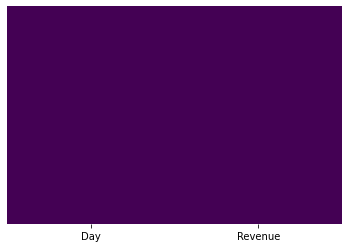

In [9]:
# Data Preparation Step 3: Check for any null data and address accordingly
# create heat map to visualize missing data
# the yellow bars stands for null points
sns.heatmap(initial_df.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
# Impute missing fields with the median value
# initial_df=initial_df.fillna(initial_df.median())
initial_df.isnull().sum()

Day        0
Revenue    0
dtype: int64

In [11]:
initial_df.shape

(731, 2)

In [12]:
# initial_df.Day = pd.date_range('1/1/2020', periods=731)
# initial_df.index = initial_df.Day
# initial_df.drop('Day', inplace=True)
from datetime import datetime
# Convert Day to DateTime format
initial_df['Date'] = (pd.date_range(
    start=datetime(2019, 1, 1), 
    periods=initial_df.shape[0], 
    freq='24H'))

# Set the Date as an index to convert the dataframe to a timeseries
initial_df.set_index('Date', inplace=True)

In [13]:
initial_df.head(10)

,Day,Revenue
Date,,
2019-01-01,1,0.000000
2019-01-02,2,0.000793
2019-01-03,3,0.825542
2019-01-04,4,0.320332
2019-01-05,5,1.082554
2019-01-06,6,0.107654
2019-01-07,7,0.493901
2019-01-08,8,0.376698
2019-01-09,9,0.304075


In [14]:
# X=initial_df.index
# y=initial_df.Revenue
time_series = initial_df.drop('Day', axis=1)
time_series.head()

,Revenue
Date,
2019-01-01,0.000000
2019-01-02,0.000793
2019-01-03,0.825542
2019-01-04,0.320332
2019-01-05,1.082554


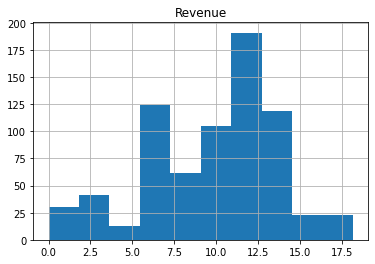

In [15]:
time_series.hist()
plt.rcParams['figure.figsize'] = 20,5
plt.show()

### C1.  Provide a line graph visualizing the realization of the time series.
*Rubric: The submission provides a line graph that aligns with the chosen dataset. The line graph is clearly labeled and is a complete realization of the time series.*


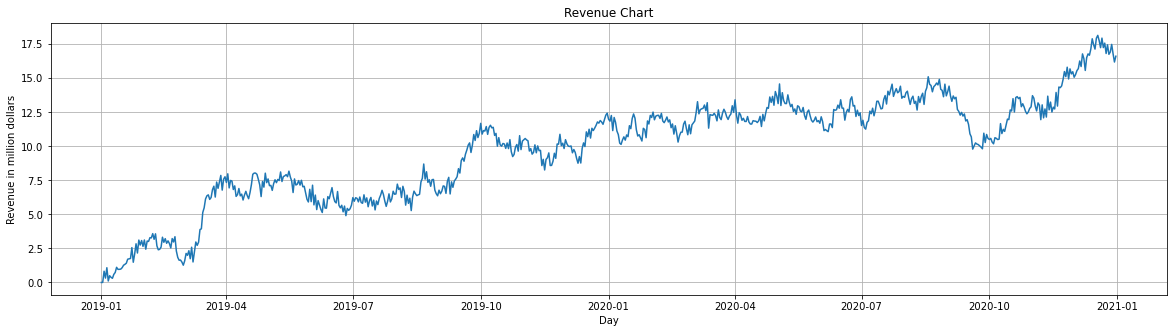

In [16]:
plt.figure.figize=(20,5)
plt.plot(time_series.Revenue)
plt.title('Revenue Chart')
plt.xlabel('Day')
plt.ylabel('Revenue in million dollars')
plt.grid(True)
plt.show()

### C2.  Describe the time step formatting of the realization, including any gaps in measurement and the length of the sequence.
*Rubric: The submission accurately describes the time step formatting of the realization, including any gaps in measurement and the length of the sequence.*

The time step formatting includes:
- Time Period: First 2 years of operation
- Frequency: 24H (daily)
- Patterns:
    - An increase in revenue over the first 2 years with a range of 0 to 18,154,769 dollars

### C3.  Evaluate the stationarity of the time series.
*Rubric: The submission accurately evaluates the stationarity of the time series, and the evaluation aligns with the chosen dataset and the research question.*

A KPSS test can be used to determine if a time series is trend stationary. It uses null and alternative hypothesis:
- H_0: The time series is trend stationary
- H_A: The time series is _not_ trend stationary.

I have selected to set the significance level for the p-value to .05. This means that if the KPSS evaluation returns a p_value > 0.05 then I will reject the null hypothesis which means that the time series is trend stationary

In [17]:
# Drop any null columns
time_series.dropna(inplace=True)

In [18]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Resource: https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
        
check_stationarity(time_series)

ADF Statistic: -1.924612
p-value: 0.320573
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569
Non-stationary


The time series is non-stationary. This means the time series needs to be differenced.

<AxesSubplot:title={'center':'Differenced TeleCo Daily Revenue'}, xlabel='Date'>

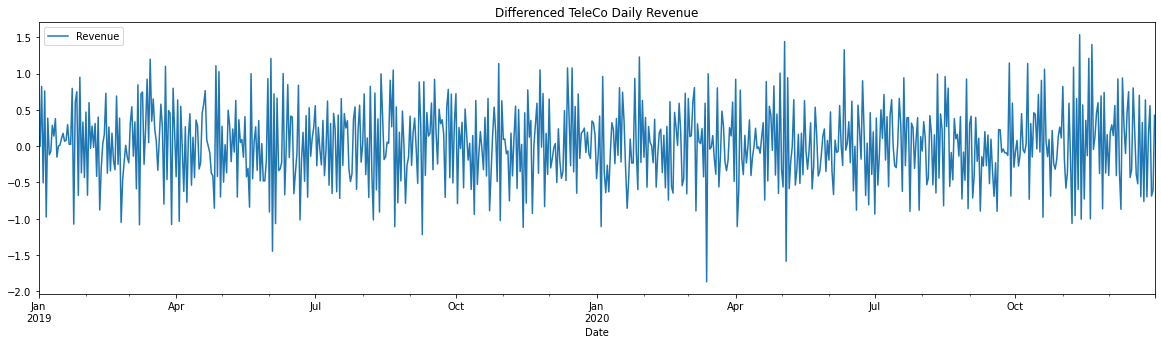

In [19]:
# create a differenced series
ts_stationary = time_series.diff()
ts_stationary.plot(figsize=(20,5), title="Differenced TeleCo Daily Revenue")

In [20]:
ts_stationary.isnull().sum()

Revenue    1
dtype: int64

In [21]:
ts_stationary.dropna(inplace=True)
ts_stationary.head(5)

,Revenue
Date,
2019-01-02,0.000793
2019-01-03,0.824749
2019-01-04,-0.505210
2019-01-05,0.762222
2019-01-06,-0.974900


Check that the differenced data is now stationary and ready for modeling.

In [22]:
check_stationarity(ts_stationary)

ADF Statistic: -44.874527
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569
Stationary


In [23]:
ts_stationary.shape

(730, 1)

### C5.  Provide a copy of the cleaned dataset.
*Rubric: The submission provides a copy of a fully prepared, cleaned data set.*


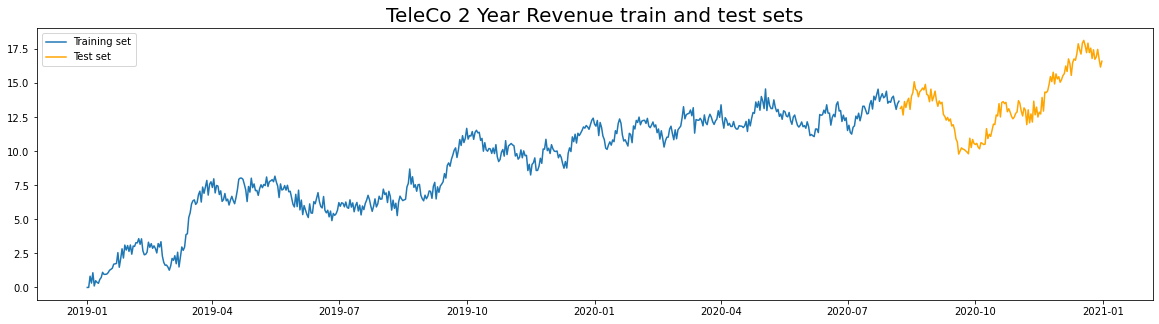

In [24]:
# Split the clean_df -- train_df = first 80%, test_df = last 20%
test_size = 146 #20% of 730

train_data = time_series[:-test_size]
# train_data = ts_stationary.loc[:'2020-09-30']
train_data.sort_index()
train_data.to_csv('./Time Series Churn Data/train_data')
test_data = time_series[-test_size:]
# test_data = ts_stationary.loc['2020-10-01':]
test_data.sort_index()
test_data.to_csv('./Time Series Churn Data/test_data')


plt.figure(figsize=(20,5))
plt.title('TeleCo 2 Year Revenue train and test sets', size=20)
plt.plot(train_data, label='Training set')
plt.plot(test_data, label='Test set', color='orange')
plt.legend();

### C4.  Explain the steps used to prepare the data for analysis, including the training and test set split.
*Rubric: The submission explains the steps used to prepare the data for analysis. Each step is complete and includes the training and test set split and relates to preparing for time series modeling.*

Step 1: Import the libraries and packages needed for data exploration, cleaning, and splitting.<br>
Step 2: Look at the head of the data to get an idea of what we are working with. <br>
Step 3: Describe the data to see the basic statistics of the data.<br>
Step 4: Rename the Revenue column to Revenue (M) for clarity.<br>
Step 5: Check for missing data. The model won't work if there is missing data in the dataframe. <br>
Step 6: Look at the data types to know how to convert them if necessary.<br>
Step 7: Convert Days to Dates to allow for time series modeling.<br>
Step 8: Add a frequency to the dataframe to allow for time series modeling. <br>
Step 9: Set the Day column as the index on the dataframe to allow for time series modeling.<br>
Step 10: Plot a line graph to visualize the initial time series and get an intuitive feeling for trends.<br>
Step 11: Evaluate the stationarity of the data with adfuller.<br>
Step 12: Create a difference series and plot it to a line graph to ensure it is normalized.<br>
Step 13: Check that the differenced data is now stationary. <br>
Step 13: Save the differenced dataframe as the clean data. <br>
Step 14: Split the data into Train and Test data.

# Part IV:  Model Identification and Analysis

## D.  Analyze the time series dataset by doing the following:

### D1.  Report the annotated findings with visualizations of your data analysis, including the following elements:
*Rubric: The submission reports the annotated findings with visualizations of the data analysis. The findings are complete and accurate and include each of the 6 listed elements.*

#### D1.5 the decomposed time series

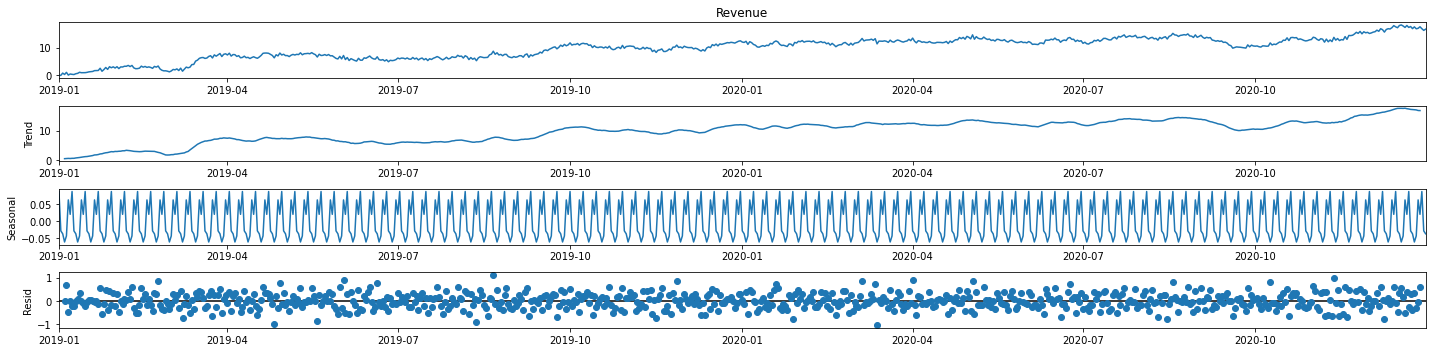

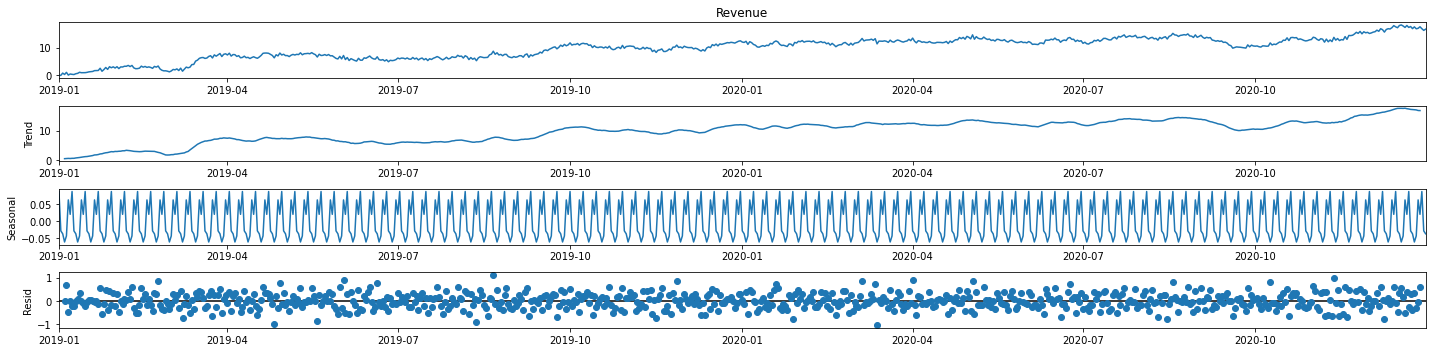

In [25]:
# Decompose time_series (not stationary) to see components of TS
result = seasonal_decompose(time_series['Revenue'], model='additive')
result.plot()

#### D1.1 the presence or lack of a seasonal component
There is a presence of a seasonal component that appears to be weekly.


<AxesSubplot:title={'center':'Seasonality'}, xlabel='Date'>

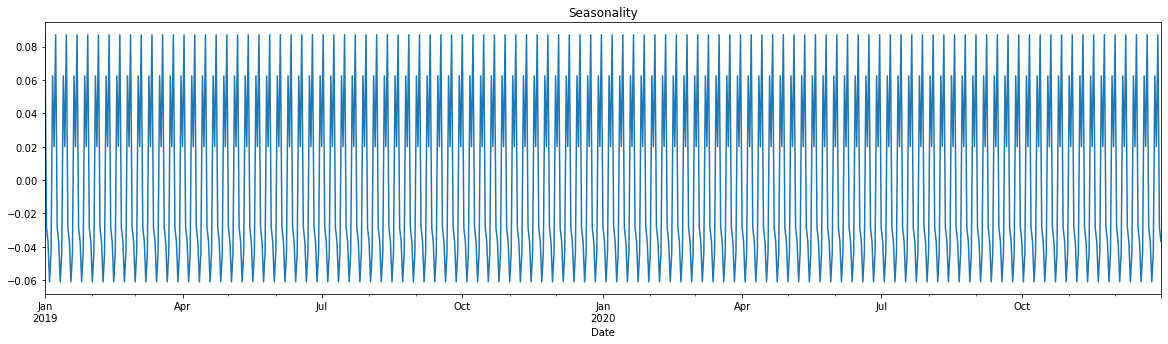

In [26]:
plt.title('Seasonality')
result.seasonal.plot()

#### D1.2 trends
We know for looking at the original line graph for the time series that there is an upward trend.

<AxesSubplot:title={'center':'Trend'}, xlabel='Date'>

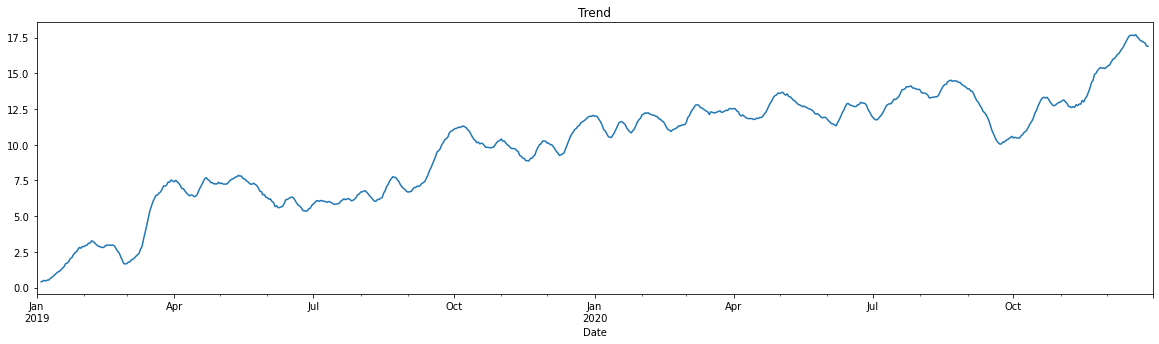

In [27]:
plt.title('Trend')
result.trend.plot()

#### D1.6 confirmation of the lack of trends in the residuals of the decomposed series
There are no apparent trends in the residuals.

#### D1.4 spectral density

**What is Spectral Density?**
*Source: https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc442.htm*
- Time Series sometimes shows periodic behavior which can be difficult to understand. Spectral Density is used to discover underlying periodicities.
- You must first transform the dataframe from the time domain to the frequency domain.
- The covariance of the time series can be represented by a function called spectral density, which is estimated using the squared correlation between the time series and sine/cosine waves at different frequencies spanned by the series. 
- Periodicity is the fact of something happening at regularly-spaced periods of time (ie phases of the moon).

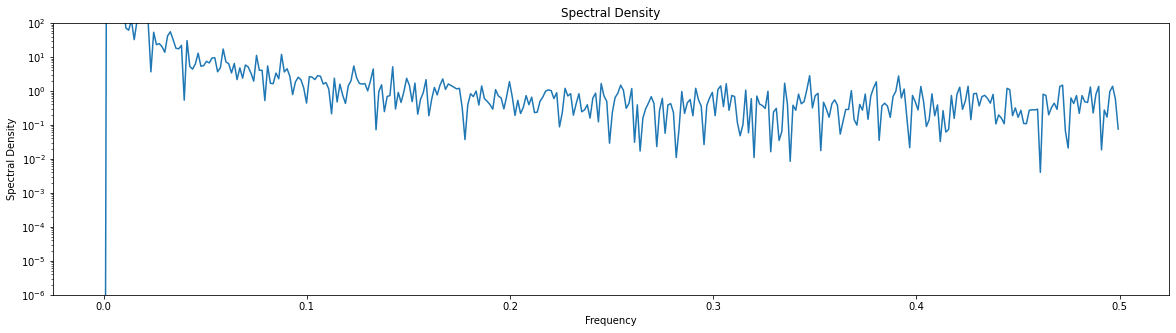

In [28]:
f, Pxx_den = signal.periodogram(time_series['Revenue'])
plt.semilogy(f, Pxx_den)
plt.ylim(1e-6, 1e2)
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

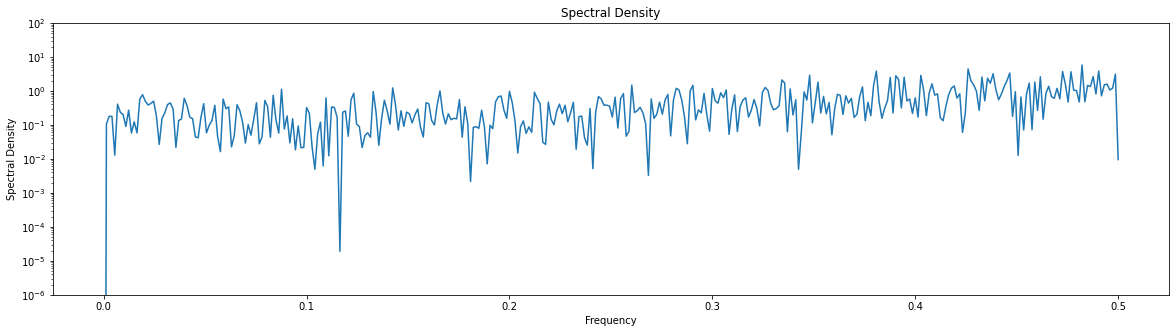

In [29]:
f, Pxx_den = signal.periodogram(ts_stationary['Revenue'])
plt.semilogy(f, Pxx_den)
plt.ylim(1e-6, 1e2)
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

<AxesSubplot:xlabel='Date'>

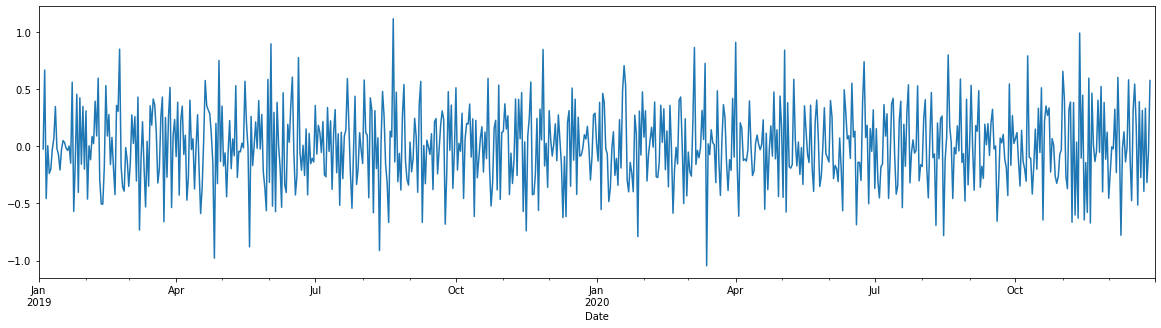

In [30]:
result.resid.plot()

Based on the results of the seasonal decomposition the ts_stationary dataframe: 
- Seasonality is present at what looks like a weekly seasonality
- There looks to be no trend in the decomposed graph but we know for our original graph there is an upward trend
- No observable patterns in the residuals

#### D1.3 auto correlation function

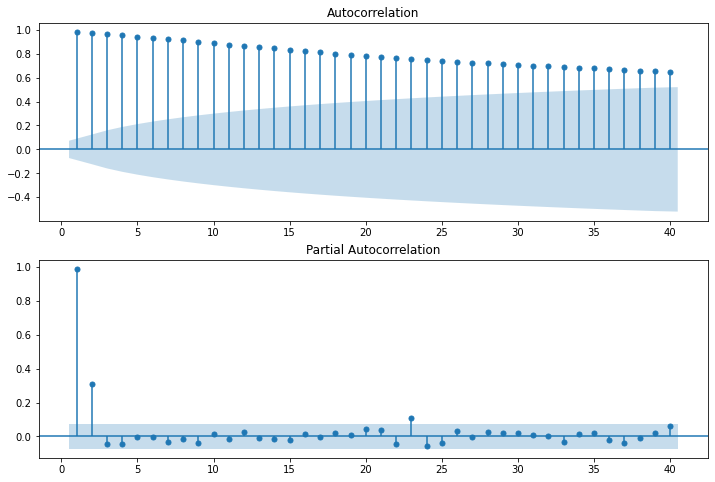

In [31]:
# Perform acf / pacf to confirm stationarity
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(time_series, zero=False, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(time_series, zero=False, lags=40, ax=ax2)
# plot_pacf(df_train, lags=100)

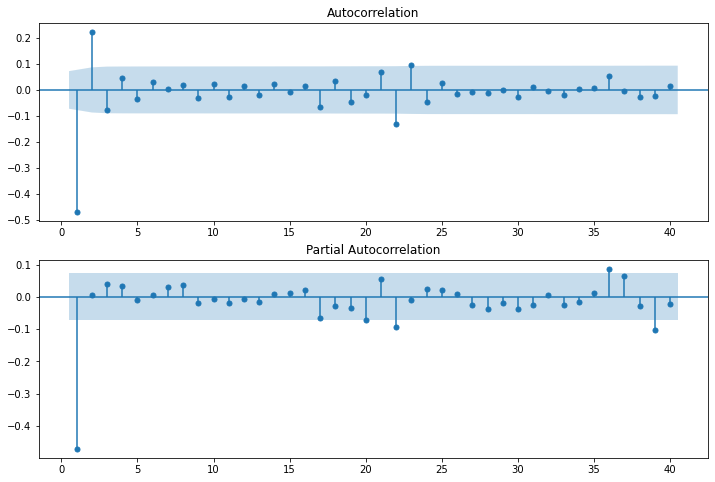

In [32]:
# Perform acf / pacf to confirm stationarity
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_stationary, zero=False, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_stationary, zero=False, lags=40, ax=ax2)
# plot_pacf(df_train, lags=100)

Source: https://geometrein.medium.com/time-series-forecasting-with-sarimax-c352e4f2012e

In the graphs above, each spike (lag) which above the shaded area is considered to be statistically significant. <br>

#### ACF:

First significant lags are lag 1 and 2. This means that the revenue decreases/increases gradually from day to day. Hence the revenue during the previous day might tell us something about revenue during the current day.

The last significant lags of interest are at 22 and 23 which indicate a seasonal trend every few weeks.

#### PACF:

With PACF we can see that lag 1, 23, 36, 39 have the highest correlation. This means that seasons 23, 15, and 3 days apart are directly correlated regardless of what is happening in between.

In [33]:
from pmdarima.arima.utils import ndiffs
y = time_series.Revenue

## Adf Test
ndiffs(y, test='adf')  # 0

# KPSS test
ndiffs(y, test='kpss')  # 1

# PP test:
ndiffs(y, test='pp')  # 0

0

In [34]:
from pmdarima.arima.utils import nsdiffs
y = time_series.Revenue

## Ocsb Test
nsdiffs(y, test='ocsb', m=90)  # 0

0

For our modeling we should set d=1 and D=0

### E2.  Provide an annotated visualization of the forecast of the final model compared to the test set.
*Rubric: The submission provides a complete annotated visualization of the forecast of the final model compared to the test set, and the forecast aligns to part D1.*

### Observations:
**The standardize residual plot:** The residuals over time don’t display any obvious patterns. They appear as white noise.
**The Normal Q-Q-plot:** Shows that the ordered distribution of residuals follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). <br>
**Histogram and estimated density plot:** The KDE follows the N(0,1) line however with noticeable differences. As mentioned before our distribution has heavier tails.<br>
**The Correlogram plot:** Shows that the time series residuals have low correlation with lagged versions of itself. Meaning there are no patterns left to extract in the residuals.<br>

Lets test the model on our training set:

### D2.  Identify an autoregressive integrated moving average (ARIMA) model that takes into account the observed trend and seasonality of the time series data.
*Rubric: The submission identifies an ARIMA model that takes into account the observed trend and seasonality of the time series data. The identified ARIMA model is appropriate for the dataset and the chosen research question.*


### D3.  Perform a forecast using the derived ARIMA model.
*Rubric: The submission provides an accurate forecast using the derived ARIMA model identified in part D2.*


In [35]:
# Pick the best order by AIC.
best_aic = np.inf
best_order = None
best_mdl = None
rng = range(3)
for p in rng:
    for q in rng:
        try:
            model = SARIMAX(ts_stationary, order=(p,1,q), trend='c')
            results = model.fit()
            temp_aic = results.aic
            print(p, q, results.aic, results.bic)
            if temp_aic < best_aic:
                best_aic = temp_aic
                best_order = (p,q)
                best_mdl = temp_model
        except:
             print(p,q,None,None)

print('\nBest AIC: {:6.5f} | order: {}'.format(best_aic, best_order))

0 0 1947.9521256153603 1957.1354730793776
0 0 None None
0 1 1170.696876247733 1184.471897443759
0 1 None None
0 2 1028.1635101631455 1046.53020509118
0 2 None None
1 0 1380.8764193084626 1394.6514405044886
1 1 991.7526603525669 1010.1193552806014
1 1 None None
1 2 993.7478860139004 1016.7062546739437
2 0 1222.465815459409 1240.8325103874436
2 1 993.7415760269721 1016.6999446870154
2 2 1009.7021674076618 1037.2522097997137

Best AIC: 991.75266 | order: (1, 1)


In [36]:
# find the best model using auto_arima
auto_arima_model = auto_arima(time_series['Revenue'], 
                            seasonal=True, m=90, # quarterly seasonality
                            d=1, D=1,
                            start_p=1, start_q=1,
                            max_p=2, max_q=2,
                            max_P=2, max_Q=2,
                            trace=True,
                            error_action='ignore',
                            supress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[90]             : AIC=inf, Time=152.91 sec
 ARIMA(0,1,0)(0,1,0)[90]             : AIC=1433.753, Time=4.11 sec
 ARIMA(1,1,0)(1,1,0)[90]             : AIC=inf, Time=20.76 sec
 ARIMA(0,1,1)(0,1,1)[90]             : AIC=inf, Time=57.66 sec
 ARIMA(0,1,0)(1,1,0)[90]             : AIC=inf, Time=12.11 sec
 ARIMA(0,1,0)(0,1,1)[90]             : AIC=inf, Time=56.52 sec
 ARIMA(0,1,0)(1,1,1)[90]             : AIC=inf, Time=91.41 sec
 ARIMA(1,1,0)(0,1,0)[90]             : AIC=1251.010, Time=3.04 sec
 ARIMA(1,1,0)(0,1,1)[90]             : AIC=inf, Time=50.79 sec
 ARIMA(1,1,0)(1,1,1)[90]             : AIC=inf, Time=96.95 sec
 ARIMA(2,1,0)(0,1,0)[90]             : AIC=1252.759, Time=4.18 sec
 ARIMA(1,1,1)(0,1,0)[90]             : AIC=1252.813, Time=5.29 sec
 ARIMA(0,1,1)(0,1,0)[90]             : AIC=1290.664, Time=3.79 sec
 ARIMA(2,1,1)(0,1,0)[90]             : AIC=1253.220, Time=20.24 sec
 ARIMA(1,1,0)(0,1,0)[90] intercept   : AIC=1252.9

In [37]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  731
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 90)   Log Likelihood                -623.505
Date:                            Sun, 31 Jul 2022   AIC                           1251.010
Time:                                    12:06:26   BIC                           1259.933
Sample:                                         0   HQIC                          1254.473
                                            - 731                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5007      0.035    -14.337      0.000      -0.569      -0.432
sigma2         0.4107      0.021     19.674      0.000       0.370       0.452
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.69
Prob(Q):                              0.79   Prob(JB):                         0.10
Heteroskedasticity (H):               1.13   Skew:                            -0.01
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
# Create the seasonal time series seasonal model with auto_arima recommendation for quarterly data
model = SARIMAX(train_data['Revenue'], order=(auto_arima_model.order), seasonal_order=(auto_arima_model.seasonal_order))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Revenue   No. Observations:                  585
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 90)   Log Likelihood                -472.781
Date:                            Sun, 31 Jul 2022   AIC                            949.562
Time:                                    12:06:30   BIC                            957.967
Sample:                                01-01-2019   HQIC                           952.862
                                     - 08-07-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5252      0.039    -13.431      0.000      -0.602      -0.449
sigma2         0.3967      0.022     18.217      0.000       0.354       0.439
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 9.88
Prob(Q):                              0.63   Prob(JB):                         0.01
Heteroskedasticity (H):               1.04   Skew:                             0.01
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Part V:  Data Summary and Implications

## E.  Summarize your findings and assumptions, including the following points:

### E1.  Discuss the results of your data analysis, including the following:
*Rubric: The submission accurately discusses the results of the data analysis and includes each of the 4 given points. The discussion aligns with the research question and the data analysis from part A.*


#### E1.1 the selection of an ARIMA model
The SARIMAX model was selected using the pmdarima.arima auto_arima function. SARIMAX

#### E1.2 the prediction interval of the forecast
The prediction interval of the forecast was set to the next quarter so that the company could make decisions.

#### E1.3 a justification of the forecast length
The forecast length was selected to be a quarter because it was shown to be the best selection by experimenting with different start values for the SARIMAX models.

#### E1.4 the model evaluation procedure and error metric

It is not presented here by different prediction ranges were tested from -365 to -45 and -90 as the start parameter for the prediction was proven to be the most accurate. This tells that the model can forecast up to a quarter in the future.

In [39]:
# Calculate Mean Absolute Error for Qaurterly Results
mae=np.mean(np.abs(results.resid))
print("Quarterly MAE: ", mae)

Quarterly MAE:  0.48942256877411217


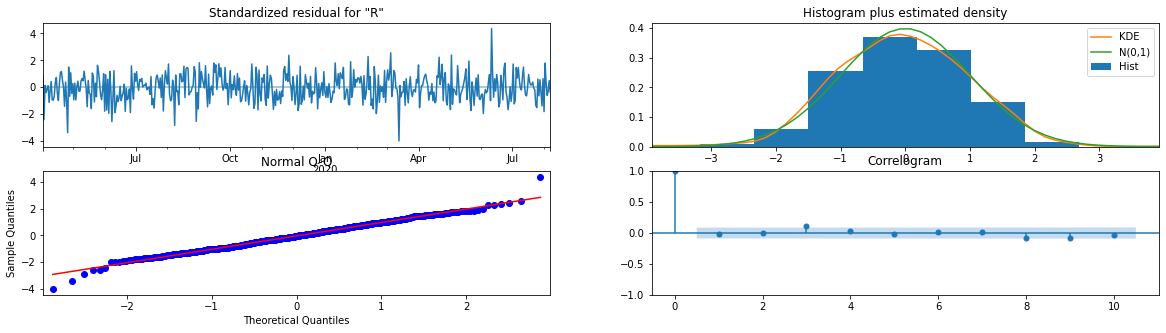

In [40]:
results.plot_diagnostics().show()

### D4.  Provide the output and calculations of the analysis you performed.
*Rubric: The submission provides all the complete and accurate output and calculations of the analysis performed.*


In [41]:
# Perfrom forcast on the training set 

In [42]:
# Validate with the test data

# Generate predictions
prediction = results.get_prediction(start=-34, end=test_data.index[-1])

#Extract prediction mean
mean_prediction = prediction.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = prediction.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Revenue']
upper_limits = confidence_intervals.loc[:,'upper Revenue']

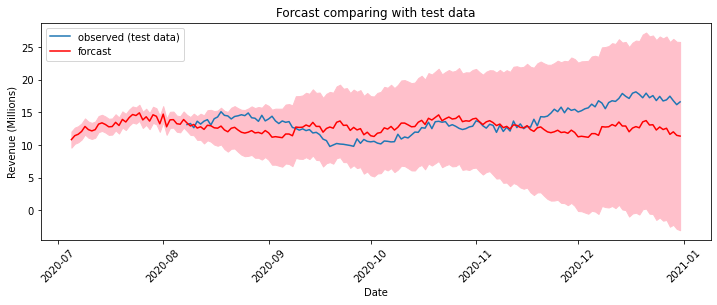

In [43]:
# Plot test data
plt.figure(figsize=(12,4))
plt.plot(test_data.index, test_data['Revenue'], label='observed (test data)')

# Plot the mean predictions
plt.plot(mean_prediction.index, mean_prediction, color='r', label='forcast')

# Shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# Set labels, legends and show the plot
plt.title('Forcast comparing with test data')
plt.xlabel('Date')
plt.ylabel('Revenue (Millions)')
plt.legend(loc='upper left')
plt.xticks(rotation = 45)
plt.show()

### E2.  Provide an annotated visualization of the forecast of the final model compared to the test set.
*Rubric: The submission provides a complete annotated visualization of the forecast of the final model compared to the test set, and the forecast aligns to part D1.*

In [44]:
# PERFORM FORCAST

# Forecast
diff_forecast = results.get_forecast(steps=180)
mean_forecast = diff_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = diff_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Revenue']
uppper_limits = confidence_intervals.loc[:,'upper Revenue']

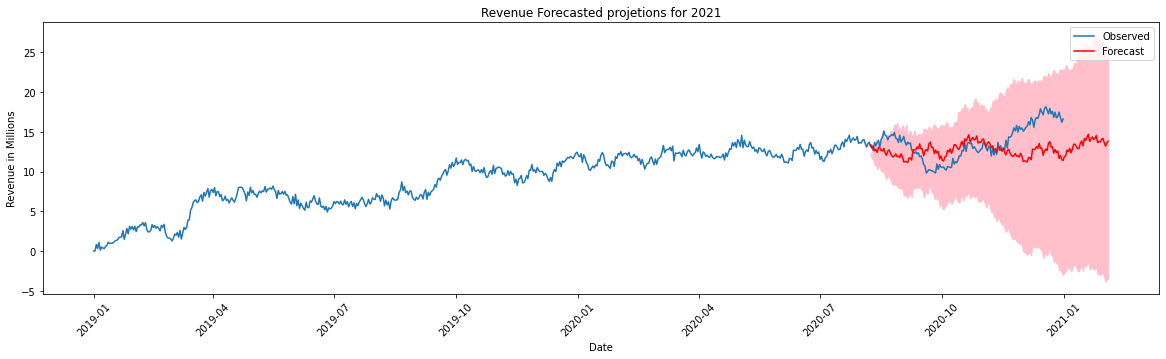

In [45]:
# Plot the forcasted Revenue data
plt.plot(time_series.index, time_series, label='Observed')

# Plost the mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='Forecast')

# Shade the area between the confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# Set labels, legends, and show plot
plt.title('Revenue Forecasted projetions for 2021')
plt.xlabel('Date')
plt.ylabel('Revenue in Millions')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Revenue projections for the year 2021'}, xlabel='Date', ylabel='Revenue in Millions'>

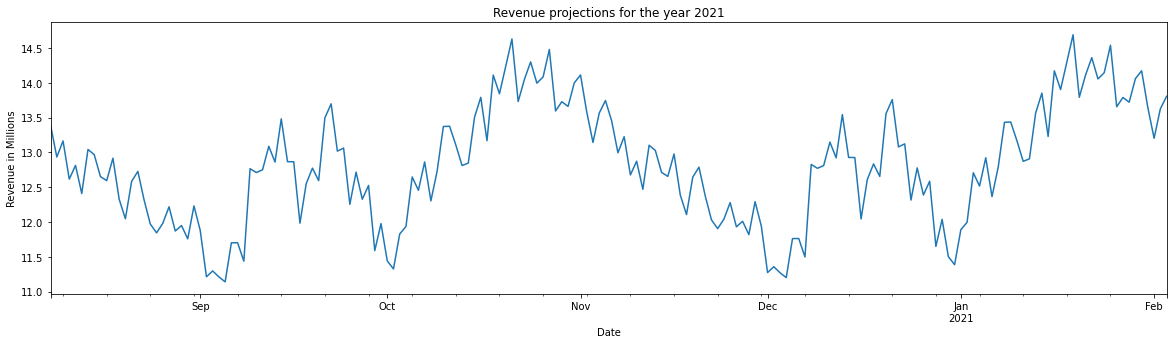

In [46]:
plt.title('Revenue projections for the year 2021')
plt.xlabel('Date')
plt.ylabel('Revenue in Millions')
mean_forecast.plot()

### D5.  Provide the code used to support the implementation of the time series model.
*Rubric: The submission provides the code used to support the implementation of the time series model. The code is complete and runs without errors.*


In [47]:
# Save the model
pickle.dump(model, open('time_series_model.pkl', 'wb'))

### E3.  Recommend a course of action based on your results.
*Rubric: The submission recommends an appropriate course of action based on the results as they relate to the research question.*

The SARIMAX model was meant to perform a forecast with a prediction interval of 1 month and a forecast length of 90-180 days. Unfortunately, after trying many different solutions to achieve a model for forecasting the model failed to produce such results and therefore a model with enough accuracy cannot be provided to the company for use. The main factor is that the SARIMAX model is overfitting. Perhaps with more data or more experimentation a model could be produced to give more accurate results.   

# Part VI:  Reporting

## F.  Create your report from part E using an industry-relevant interactive development environment (e.g., a Jupyter Notebook). Include a PDF or HTML document of your executed notebook presentation.
*Rubric: The report is accurately created in an industry-relevant interactive development environment. The PDF or HTML document of the executed notebook presentation is provided and is complete and aligns with the data analysis of the report.*

## G.  List the web sources used to acquire data or segments of third-party code to support the application.
*Rubric: The submission lists all web sources used to acquire data or segments of third-party code, and all the listed web sources are reliable.*
1. https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc446.htm <br>
2. https://geometrein.medium.com/time-series-forecasting-with-sarimax-c352e4f2012e


## H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
*Rubric: The submission includes in-text citations for sources that are properly quoted, paraphrased, or summarized and a reference list that accurately identifies the author, date, title, and source location as available.*
1. https://machinelearningmastery.com/time-series-data-stationary-python/ <br>
2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html <br>
3. https://alkaline-ml.com/pmdarima/tips_and_tricks.html#period <br>


## I.  Demonstrate professional communication in the content and presentation of your submission.
*Rubric: Content reflects attention to detail, is organized, and focuses on the main ideas as prescribed in the task or chosen by the candidate. Terminology is pertinent, is used correctly, and effectively conveys the intended meaning. Mechanics, usage, and grammar promote accurate interpretation and understanding.*